In [84]:
# Clustering com kmeans
# temos de fornecer o valor de k (#clusters)
from sklearn.cluster import KMeans
from matplotlib.lines import Line2D
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KernelDensity
from scipy import stats
import math
import random

In [85]:
file_name = 'data.csv'
data = pd.read_csv(file_name)
data['Program'] = data[' Program'].map(lambda x: x.replace(" ",""))
data['CPU'] = data[' Core(s)']
data['PKG'] = data[' Package']
data['Time'] = data[' Time (ms)']
data.drop([' Program', ' GPU', ' DRAM', ' Core(s)', ' Package', ' Time (ms)',' Temperature',' Memory'],axis=1,inplace=True)
data.columns

Index(['Language', ' PowerLimit', 'Program', 'CPU', 'PKG', 'Time'], dtype='object')

Index(['Language', ' PowerLimit', 'Program', 'CPU', 'PKG', 'Time'], dtype='object')


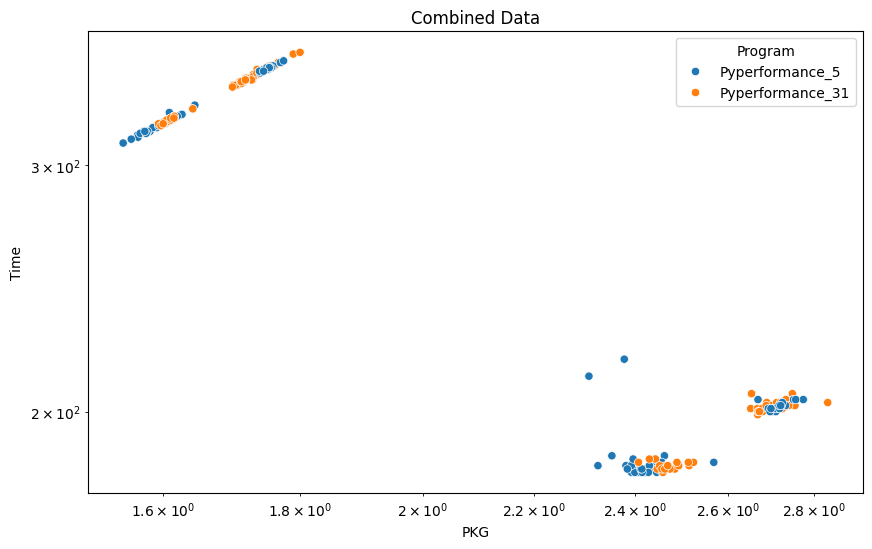

Stats for Combined Data
             Time         CPU         PKG
count  239.000000  239.000000  239.000000
mean   264.288703    1.550532    2.118497
std     72.535679    0.593666    0.465824
min    181.000000    0.897583    1.546143
25%    200.000000    0.977997    1.698944
50%    311.000000    1.054016    1.799927
75%    341.500000    2.125427    2.546143
max    361.000000    2.371887    2.832458

                    CPU                                                    \
                  count      mean       std       min       25%       50%   
Program                                                                     
Pyperformance_31  119.0  1.575046  0.607509  0.897583  1.000336  1.054016   
Pyperformance_5   120.0  1.526223  0.581134  0.901367  0.941254  1.438812   

                                       Time                                \
                       75%       max  count        mean        std    min   
Program                                                  

In [86]:
# Plotting
print(data.columns)
plt.figure(figsize=(10,6))
plt.xscale('log')  # Set x-axis to log scale
plt.yscale('log')  # Set y-axis to log scale
sea.scatterplot(data=data, hue='Program', x='PKG', y='Time')
plt.title("Combined Data")
plt.show()

# Summary statistics
print("Stats for Combined Data")
print(data[["Time", "CPU", "PKG"]].describe())
print()
print(data.groupby("Program")[["CPU", "Time"]].describe())


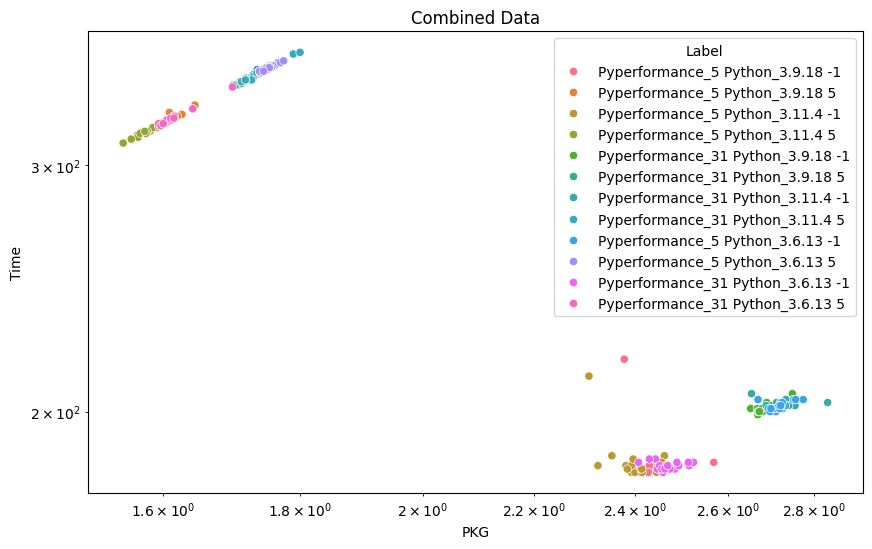

In [87]:
# Plotting
data_2 = data.copy()
data_2["Label"] = data_2["Program"]+" "+ data_2["Language"]+" "+data_2[' PowerLimit'].map(lambda x: str(x))
data_2.drop(["Program","Language"," PowerLimit"],axis=1,inplace=True)
plt.figure(figsize=(10,6))
plt.xscale('log')  # Set x-axis to log scale
plt.yscale('log')  # Set y-axis to log scale
sea.scatterplot(data=data_2, hue='Label', x='PKG', y='Time')
plt.title("Combined Data")
plt.show()

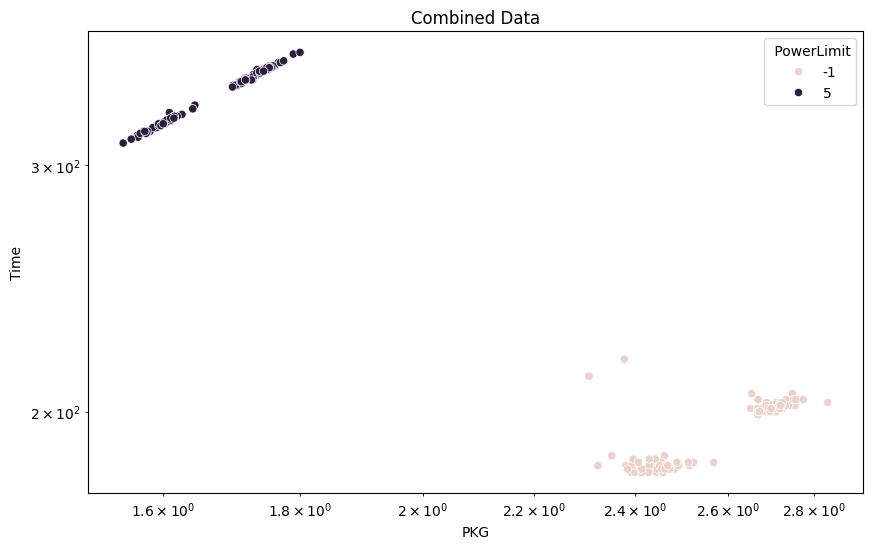

In [88]:
data_3 = data.copy()
plt.figure(figsize=(10,6))
plt.xscale('log')  # Set x-axis to log scale
plt.yscale('log')  # Set y-axis to log scale
sea.scatterplot(data=data_3, hue=' PowerLimit', x='PKG', y='Time')
plt.title("Combined Data")
plt.show()

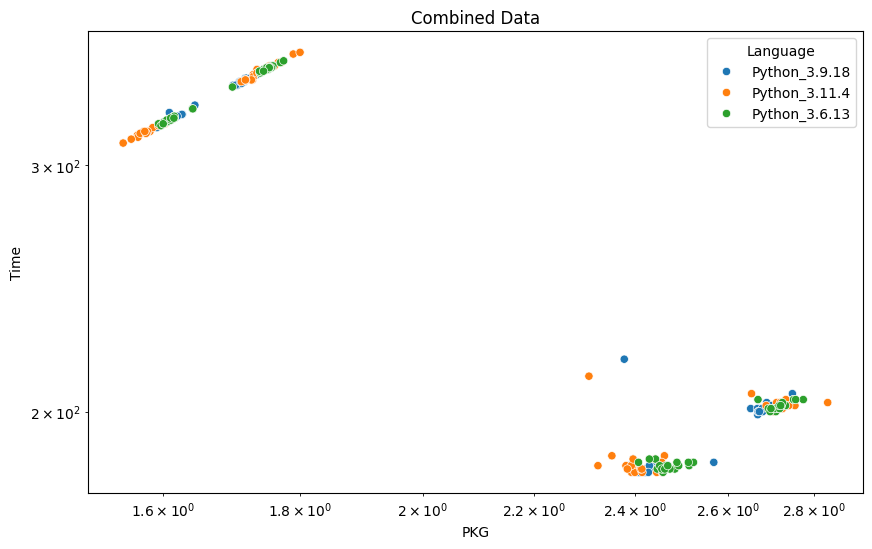

In [89]:
data_4 = data.copy()
plt.figure(figsize=(10,6))
plt.xscale('log')  # Set x-axis to log scale
plt.yscale('log')  # Set y-axis to log scale
sea.scatterplot(data=data_4, hue='Language', x='PKG', y='Time')
plt.title("Combined Data")
plt.show()

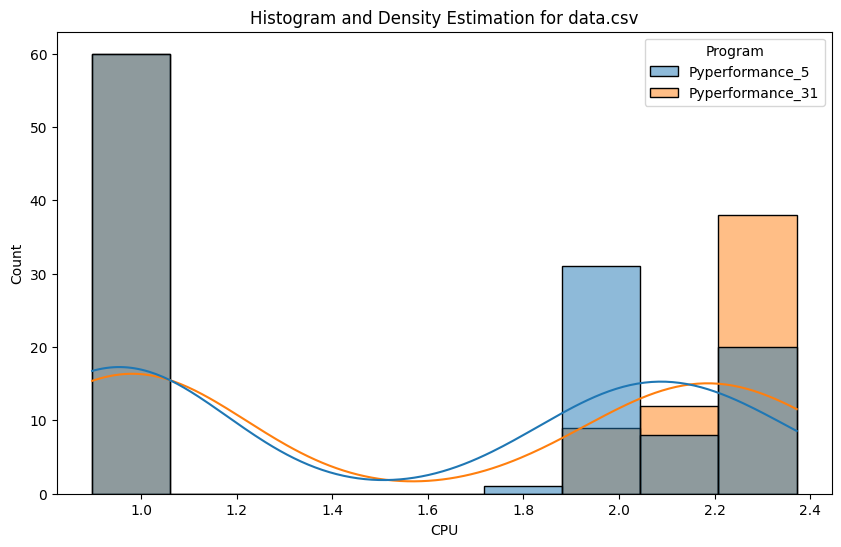

Probability density of new cases for data.csv
[0. 0. 0. 0.]




c:\Users\mikef\miniconda3\envs\CPU\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


In [90]:
plt.figure(figsize=(10,6))
sea.histplot(data=data, hue='Program', x='CPU', kde=True)  # Plot histogram with KDE
plt.title(f"Histogram and Density Estimation for {file_name}")
plt.show()

# KDE fitting
kde = KernelDensity(kernel="gaussian", bandwidth=0.75).fit(data[['CPU', 'Time']])

# Example of new cases
novos = np.array([[0.15, 3.0], [1.222, 0.3], [1.004, 0.5], [0.10, 2.51]])

# Log-likelihood (probability) density of new cases
log_dens = kde.score_samples(novos)
print("Probability density of new cases for", file_name)
print(np.exp(log_dens))
print("\n")


In [91]:
combined_df = data.copy()
combined_df["Label"] = combined_df["Program"]+" "+ combined_df["Language"]
combined_df.drop(["Program","Language"],axis=1,inplace=True)

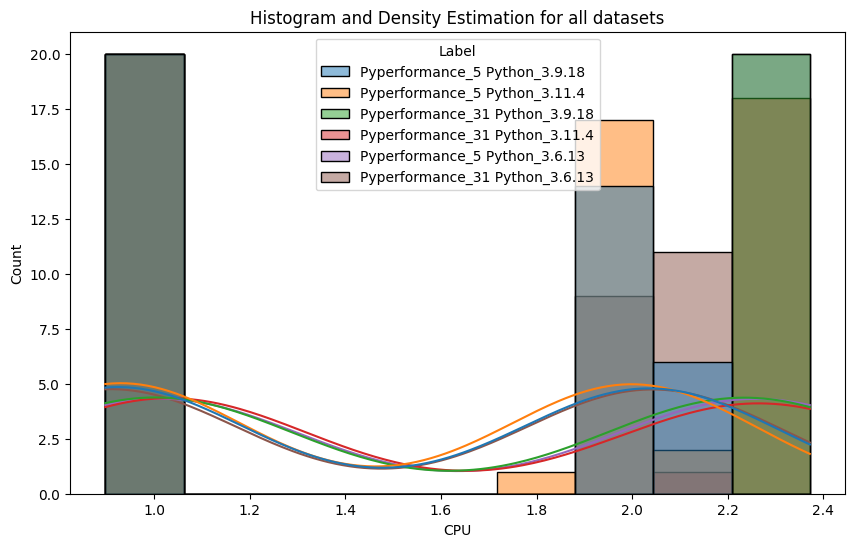

Probability density of new cases for all datasets
[0. 0. 0. 0.]




c:\Users\mikef\miniconda3\envs\CPU\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


In [92]:
# Plotting histogram and density estimation

plt.figure(figsize=(10,6))
sea.histplot(data=combined_df, hue='Label', x='CPU', kde=True)  # Plot histogram with KDE
plt.title("Histogram and Density Estimation for all datasets")
plt.show()

# KDE fitting
kde = KernelDensity(kernel="gaussian", bandwidth=0.75).fit(data[['CPU', 'Time']])

# Example of new cases
novos = np.array([[0.15, 3.0], [1.222, 0.3], [1.004, 0.5], [0.10, 2.51]])

# Log-likelihood (probability) density of new cases
log_dens = kde.score_samples(novos)
print("Probability density of new cases for all datasets")
print(np.exp(log_dens))
print("\n")


In [93]:
def plot_correlation_with_label(data, label_column):
    # Calculate correlation
    pearson_corr, pearson_pvalue = stats.pearsonr(data['CPU'], data['PKG'])
    spearman_corr, spearman_pvalue = stats.spearmanr(data['CPU'], data['PKG'])
    kendall_corr, kendall_pvalue = stats.kendalltau(data['CPU'], data['PKG'])

    print("Pearson Correlation coefficient:", pearson_corr, "p-value:", pearson_pvalue)
    print("Spearman Correlation coefficient:", spearman_corr, "p-value:", spearman_pvalue)
    print("Kendall Tau Correlation coefficient:", kendall_corr, "p-value:", kendall_pvalue)

    # Plotting
    plt.figure(figsize=(10,6))
    plt.title('Correlation between CPU and PKG')

    palette = sea.color_palette("husl", len(data[label_column].unique()))

    # Scatter plot
    for label, color in zip(data[label_column].unique(), palette):
        plt.scatter(data[data[label_column] == label]['CPU'], 
                    data[data[label_column] == label]['PKG'],
                    color=color,
                    label=label)

    # Best fitting line
    plt.plot(np.unique(data.CPU), np.poly1d(np.polyfit(data.CPU, data.PKG, 1))(np.unique(data.CPU)), color='red')

    # Labelling axes
    plt.xlabel('CPU')
    plt.ylabel('PKG')

    plt.legend()

    plt.show()


Pearson Correlation coefficient: 0.9950834957199314 p-value: 5.283280974272473e-240
Spearman Correlation coefficient: 0.9758134624665928 p-value: 1.6750480131768348e-158
Kendall Tau Correlation coefficient: 0.8911395967687353 p-value: 1.7227946549278453e-93


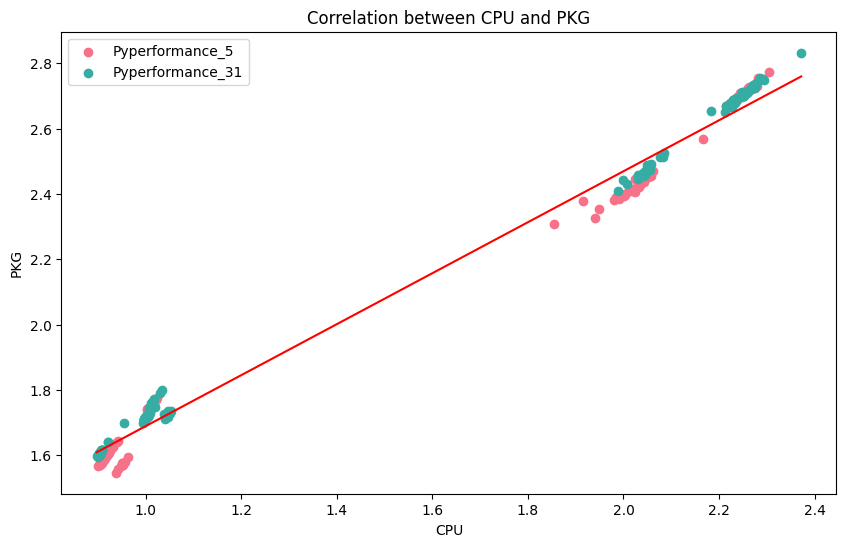

In [94]:
plot_correlation_with_label(data, 'Program')

Pearson Correlation coefficient: 0.9950834957199314 p-value: 5.283280974272473e-240
Spearman Correlation coefficient: 0.9758134624665928 p-value: 1.6750480131768348e-158
Kendall Tau Correlation coefficient: 0.8911395967687353 p-value: 1.7227946549278453e-93


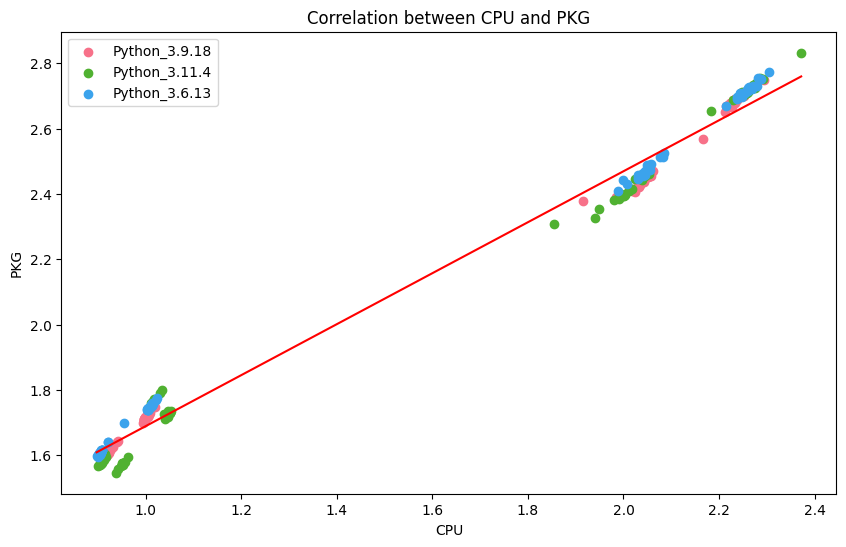

In [95]:

plot_correlation_with_label(data, 'Language')

Pearson Correlation coefficient: 0.9950834957199314 p-value: 5.283280974272473e-240
Spearman Correlation coefficient: 0.9758134624665928 p-value: 1.6750480131768348e-158
Kendall Tau Correlation coefficient: 0.8911395967687353 p-value: 1.7227946549278453e-93


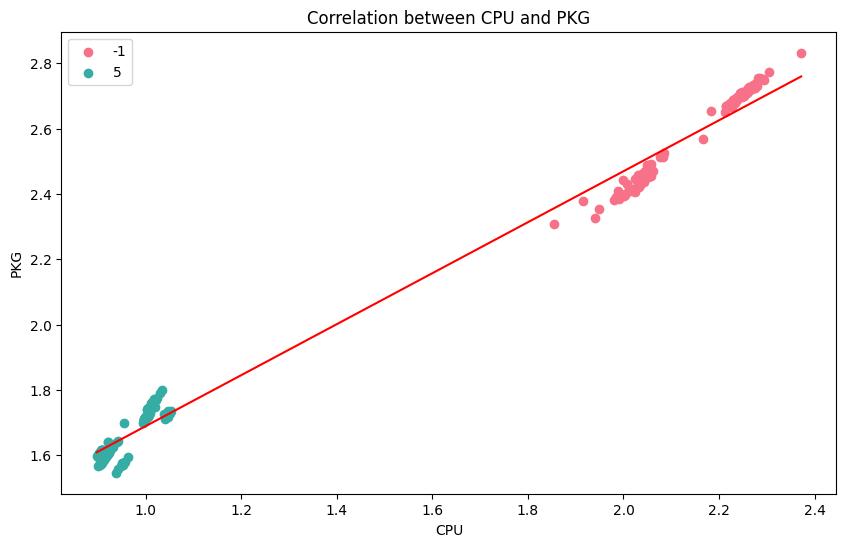

In [96]:

plot_correlation_with_label(data, ' PowerLimit')

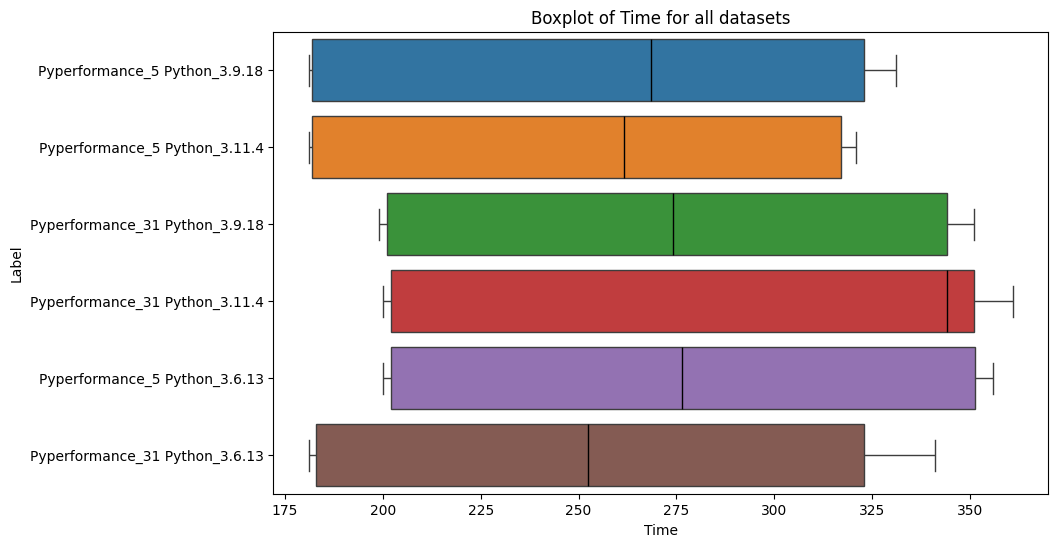

In [97]:
# Plotting boxplot
plt.figure(figsize=(10,6))
sea.boxplot(data=combined_df, hue='Label', x='Time', y='Label', medianprops={"color":"black"}, flierprops={"marker": "."})
plt.title('Boxplot of Time for all datasets')

# Labelling axes
plt.xlabel('Time')
plt.ylabel('Label')

plt.show()


Outliers e afins

number of outliers: 0 of 40 observations.
number of outliers: 0 of 40 observations.
number of outliers: 0 of 40 observations.
number of outliers: 0 of 39 observations.
40


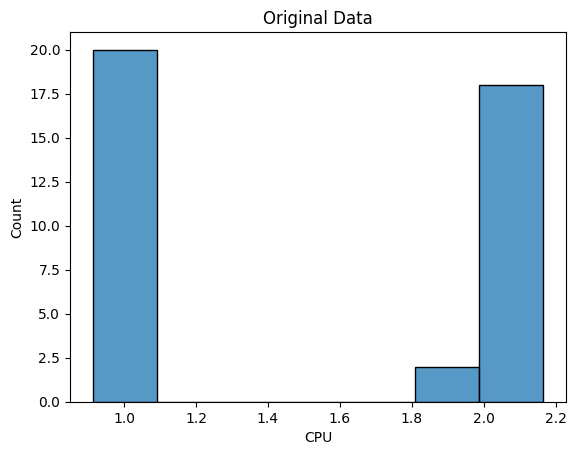

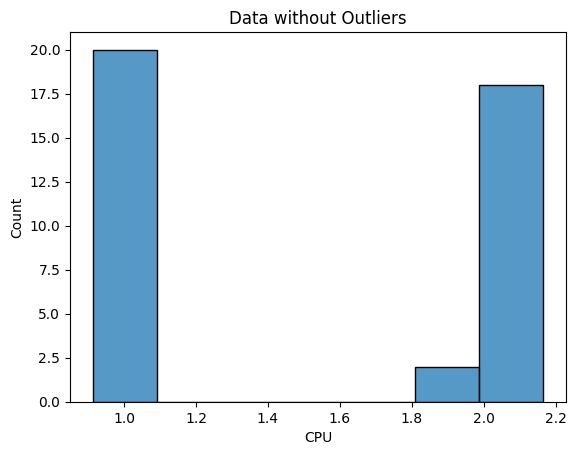

In [98]:
# remoção de outliers via as ideias incluidas nos boxplot
# IQR - Inter Quartil Range como expresso os gráficos acima

# Como a distribuição é desconhecida vamos usar o IQR.
# Com Gaussianas podiamos usar outras estrategias. Mas há vários métodos...
import seaborn as sns

def remove_outliers_quantile(data_series):
    data = data_series
    q75, q25 = data.quantile(q=0.75),data.quantile(q=0.25) # np.percentile(data.loc[:,data_column],[75,25])
    intr_qr = q75 - q25

    max = q75 + (1.5 * intr_qr)
    min = q25 - (1.5 * intr_qr)

    count_total = len(data)

    data = data[(data > min) & (data < max)]
    count_wo_outliers = len(data)

    outliers_count = count_total - count_wo_outliers
    print(f'number of outliers: {outliers_count} of {count_total} observations.')
    
    # remove outliers
    return data


# create a subset of your data
# define the data source and how to separate the data
data = combined_df.copy()
data_column = 'CPU'           # Atrib to compare
types_column_name = 'Label'    # The column name with the data in it
typeA = 'Pyperformance_5 Python_3.9.18'      # The category of data A
typeB = 'Pyperformance_31 Python_3.9.18'     # The category of data B
typeC = 'Pyperformance_5 Python_3.11.4'      # The category of data A
typeD = 'Pyperformance_31 Python_3.11.4'     # The category of data B


# create a new dataframe with the interesting subset 
df_sampleA = data[(data[types_column_name]==typeA)][data_column]
df_sampleB = data[(data[types_column_name]==typeB)][data_column]
df_sampleC = data[(data[types_column_name]==typeC)][data_column]
df_sampleD = data[(data[types_column_name]==typeD)][data_column]


# create a new dataframe with the interesting subset 
sampleA = list(df_sampleA)
sampleB = list(df_sampleB)
sampleC = list(df_sampleC)
sampleD = list(df_sampleD)


df_sampleA = remove_outliers_quantile(df_sampleA)
df_sampleB = remove_outliers_quantile(df_sampleB)
df_sampleC = remove_outliers_quantile(df_sampleC)
df_sampleD = remove_outliers_quantile(df_sampleD)


print(df_sampleA.count())
# plot 
sns.histplot(data=data[(data[types_column_name]==typeA)][data_column]).set(title='Original Data')
plt.show()
sns.histplot(data=df_sampleA).set(title='Data without Outliers')
plt.show()

Normality Check... Anderson-Darling e outros teste para verificar se amostra segue uma Gaussiana.

In [99]:
# Anderson-Darling Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson
# seed the random number generator
seed(1)
# generate univariate observations
data = sampleB
# normality test
result = anderson(data)
#    H0: the sample has a Gaussian distribution.
#    H1: the sample does not have a Gaussian distribution.

# imprime valor da estatística do test
# e depois a sequencia de valores criticos e alfas possíveis (significante values) 
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 6.633
15.000: 0.531, data does not look normal (reject H0)
10.000: 0.605, data does not look normal (reject H0)
5.000: 0.726, data does not look normal (reject H0)
2.500: 0.847, data does not look normal (reject H0)
1.000: 1.007, data does not look normal (reject H0)


Calcular um empirical pvalue para um teste de médias entre o desempenho de dois algoritmos

In [100]:
data = combined_df.copy()
data_column = 'CPU'           # Atrib to compare
types_column_name = 'Label'    # The column name with the data in it
programA = 'Pyperformance_5 Python_3.9.18'      # The category of data A
programB = 'Pyperformance_31 Python_3.9.18'     # The category of data B
programC = 'Pyperformance_5 Python_3.11.4'      # The category of data A
programD = 'Pyperformance_31 Python_3.11.4'     # The category of data B

repetitions_of_random_sampling = 1000

# create a new dataframe with the interesting subset 
data_set=data[(data[types_column_name]==programA) | (data[types_column_name]==programB)]
data_set.reset_index()

# count the number of samples in each data set 
count_A = data[data[types_column_name]==programA][types_column_name].count()
count_B = data[data[types_column_name]==programB][types_column_name].count()
org_mean_diff = data[data[types_column_name]==programA][data_column].mean() - data[data[types_column_name]==programB][data_column].mean()
if count_A != count_B: 
  print(f"Warning: The data original data sets do not have equally many elements: Data set A has {count_A} elements and Data set B has {count_B} elements") 

total = count_A + count_B
fact_r = math.factorial(total)

max_combinations = math.factorial(total) /(math.factorial(count_A) * math.factorial(total-count_A))
if max_combinations < repetitions_of_random_sampling: 
    print(f"Warning: The number of possible combinations when picking {count_A} elements from {total} elements is {max_combinations} and you have chosen {repetitions_of_random_sampling} repetitions, thus including some repetitions.")
                              
list_index = list(range(total))

# gerar samples (permutações) para medir diferença de médias!
mean_diffs = []
for i in range(repetitions_of_random_sampling):
    samples = random.sample(list_index,total)
    sampleA_index = samples[:count_A]
    sampleB_index = samples[count_A:]
    
    sampleA = data_set.iloc[sampleA_index]
    sampleB = data_set.iloc[sampleB_index]
    
    mean_diff = sampleA[data_column].mean()-sampleB[data_column].mean()
    mean_diffs.append(mean_diff)


empirical_p = np.count_nonzero(pd.Series(mean_diffs) <= org_mean_diff) / repetitions_of_random_sampling
print("empirical pvalue="+str(empirical_p))

# conclusion:
print(f"If the empirical p-value is 0 ,it means that none of the {repetitions_of_random_sampling} permuted samples "+
       f"resulted in a difference of {org_mean_diff} or lower. This is only an approximation. "+
       "The probability of getting a difference in that range is not 0, but it is very small,"+
       "according to our simulation. Therefore we can reject the null hypothesis.")

empirical pvalue=0.137
If the empirical p-value is 0 ,it means that none of the 1000 permuted samples resulted in a difference of -0.13885650634765634 or lower. This is only an approximation. The probability of getting a difference in that range is not 0, but it is very small,according to our simulation. Therefore we can reject the null hypothesis.


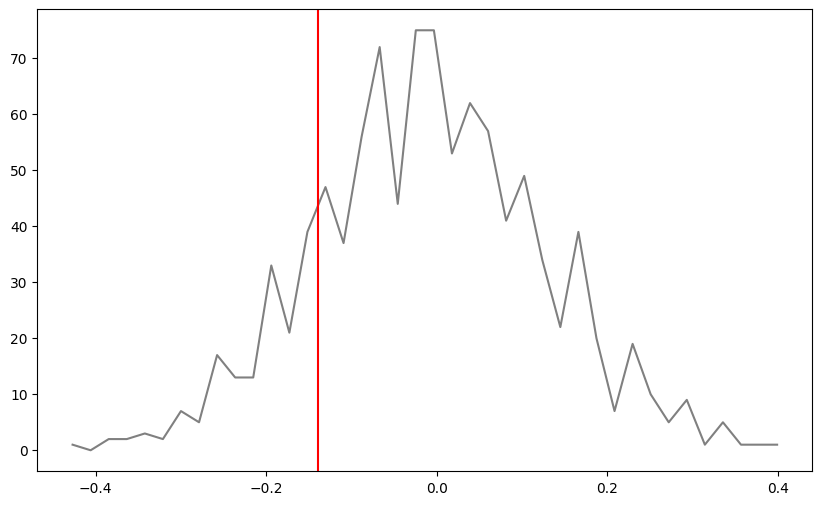

In [101]:
# graphics for empirical pvalue difference distrib
# evaluate the histogram
fig, ax = plt.subplots(figsize=(10, 6))
values, base = np.histogram(mean_diffs, bins=40)
plt.plot(base[:-1], values, c='gray')
# a red line indicating the original difference between the averages of the original samples 
plt.axvline(x = org_mean_diff, color = 'red', label = 'difference between original samples')
plt.show()

In [102]:
# Wilcoxon
from scipy.stats import wilcoxon
x =  data[data[types_column_name]==programA][data_column][0:350]
y =  data[data[types_column_name]==programB][data_column][0:350]

# teste se mediana das difs é negativa ? (less)
res = wilcoxon(x,y,zero_method='wilcox',alternative='less',method='exact') 
print("W statistics="+str(res.statistic)+"  pvalue="+str(res.pvalue))
print()

# Mann Whitney U test  Less -->  A < B
from scipy.stats import mannwhitneyu
U1, p = mannwhitneyu(x, y, method="exact",alternative="less")
print("U statistics="+str(U1)+"  pvalue="+str(p))


# KS gof test for continuous distribution 
ks, pvalue = stats.kstest(x, y, alternative="greater")
print("KS ="+str(ks)+"  pvalue="+str(pvalue))

W statistics=0.0  pvalue=9.094947017729282e-13

U statistics=400.0  pvalue=4.076496866477149e-05
KS =0.5  pvalue=3.288445662263699e-05


c:\Users\mikef\miniconda3\envs\CPU\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'RPG')

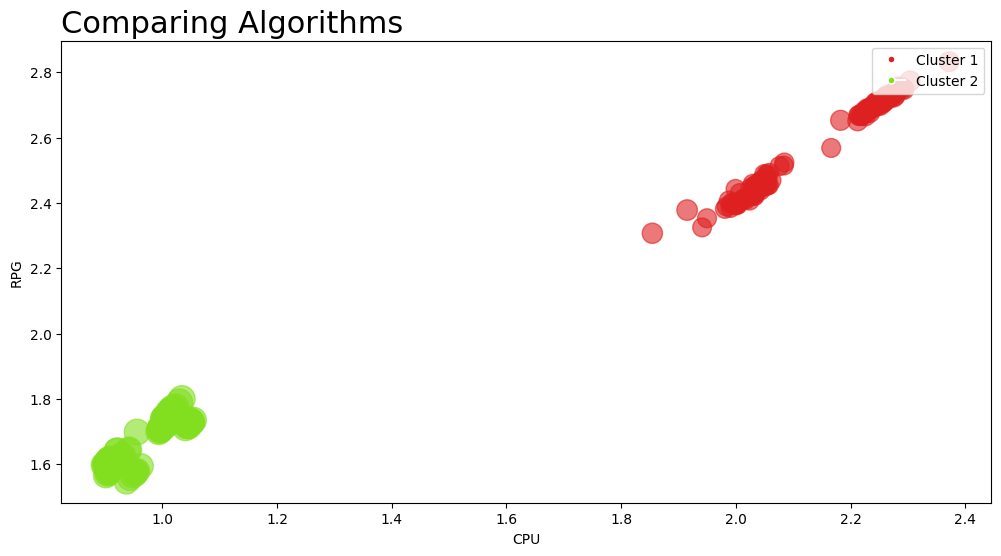

In [103]:
# Clustering com kmeans
from sklearn.cluster import KMeans
from matplotlib.lines import Line2D

df=combined_df.copy()
# preprocessa categoricos com one hot encoding
df = pd.get_dummies(df, columns=["Label"])  

#k means
kmeans = KMeans(n_clusters=2, random_state=0,n_init="auto")
#get centroids
df['cluster'] = kmeans.fit_predict(df)

centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1]})
#define and map colors
colors = ['#DF2020', '#81DF20']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1]})

plt.figure(figsize=(12,6))
plt.scatter(df.CPU, df.PKG, c=df.c, s=df.Time, alpha = 0.6)

# create a list of legend elem
## markers / records
legend_elements = [Line2D([0], [0], marker='o', color='w', 
                          label='Cluster {}'.format(i+1), 
               markerfacecolor=mcolor, markersize=5) 
for i, mcolor in enumerate(colors)]

# plot legend
plt.legend(handles=legend_elements, loc='upper right')

# title and labels
plt.title('Comparing Algorithms', loc='left', fontsize=22)
plt.xlabel('CPU')
plt.ylabel('RPG')
